# Opening our DataSet

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'diabetes.csv'

df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`No null values?`

C:\Users\mahmo\AppData\Local\Temp\ipykernel_27564\880763058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Glucose', data=df, palette='Set2')


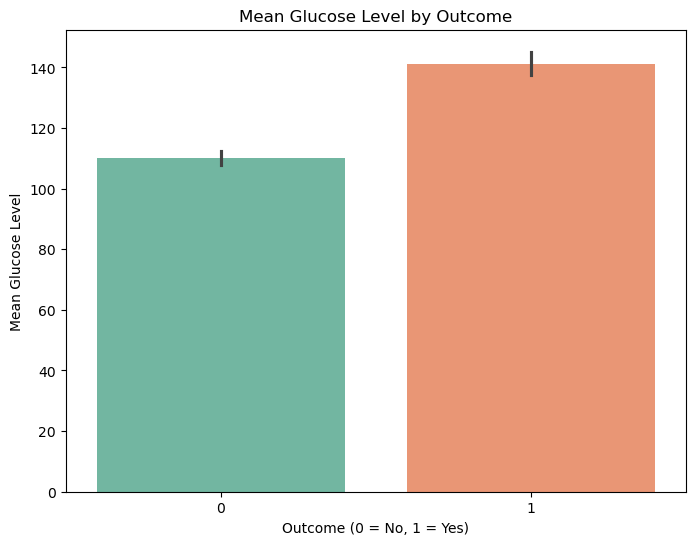

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Mean Glucose Level by Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Mean Glucose Level')
plt.show()


C:\Users\mahmo\AppData\Local\Temp\ipykernel_27564\407616938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='BMI', data=df, palette='Set2')


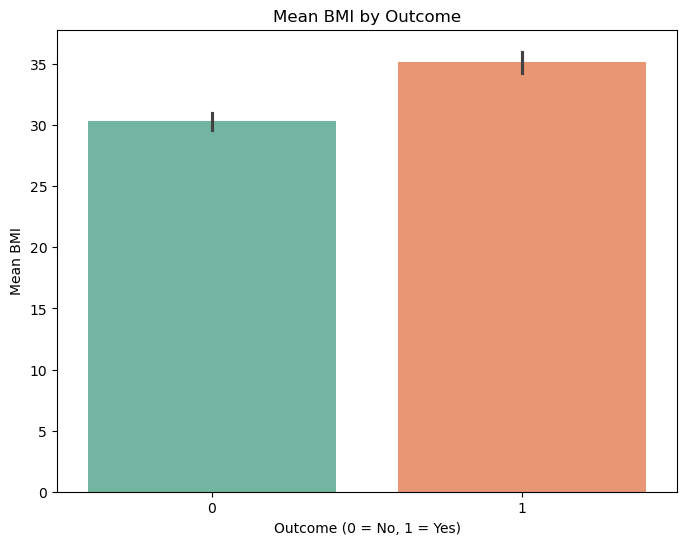

In [3]:
# Bar plot for BMI by Outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('Mean BMI by Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Mean BMI')
plt.show()


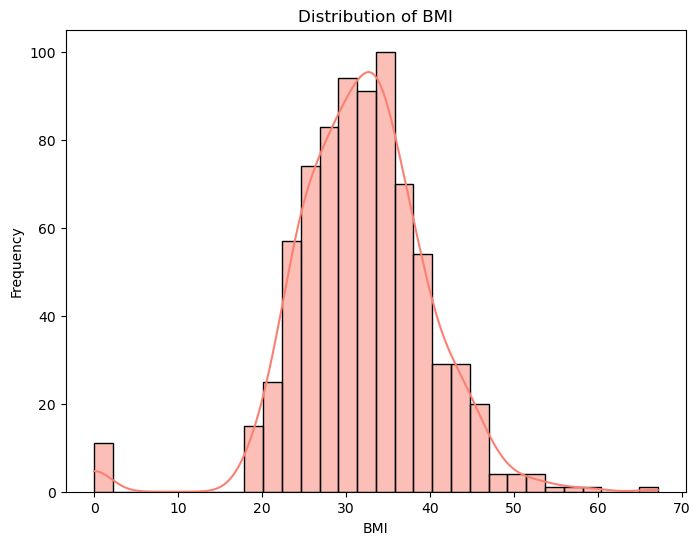

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='salmon', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


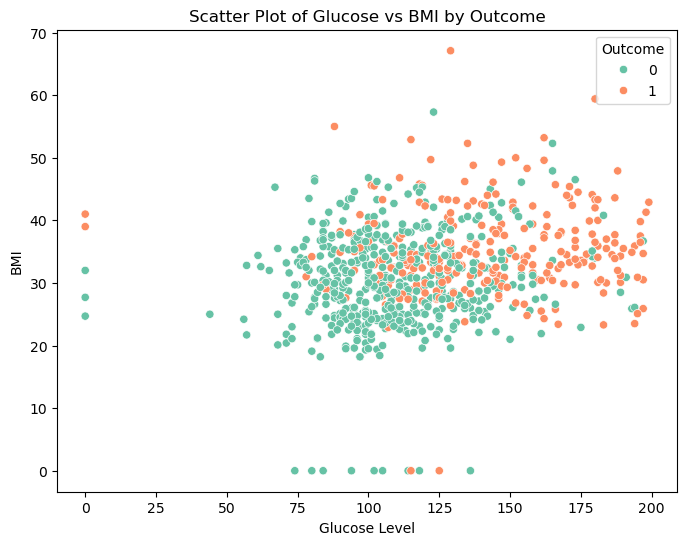

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set2')
plt.title('Scatter Plot of Glucose vs BMI by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()


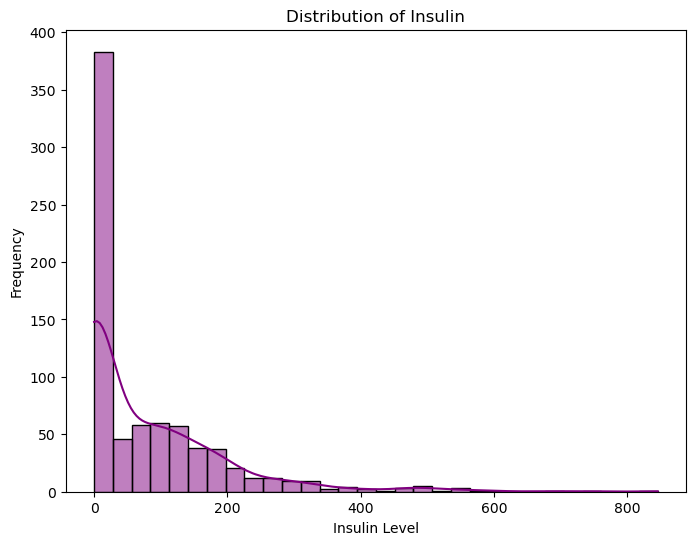

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], kde=True, color='purple', bins=30)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.show()


## Check for outliers

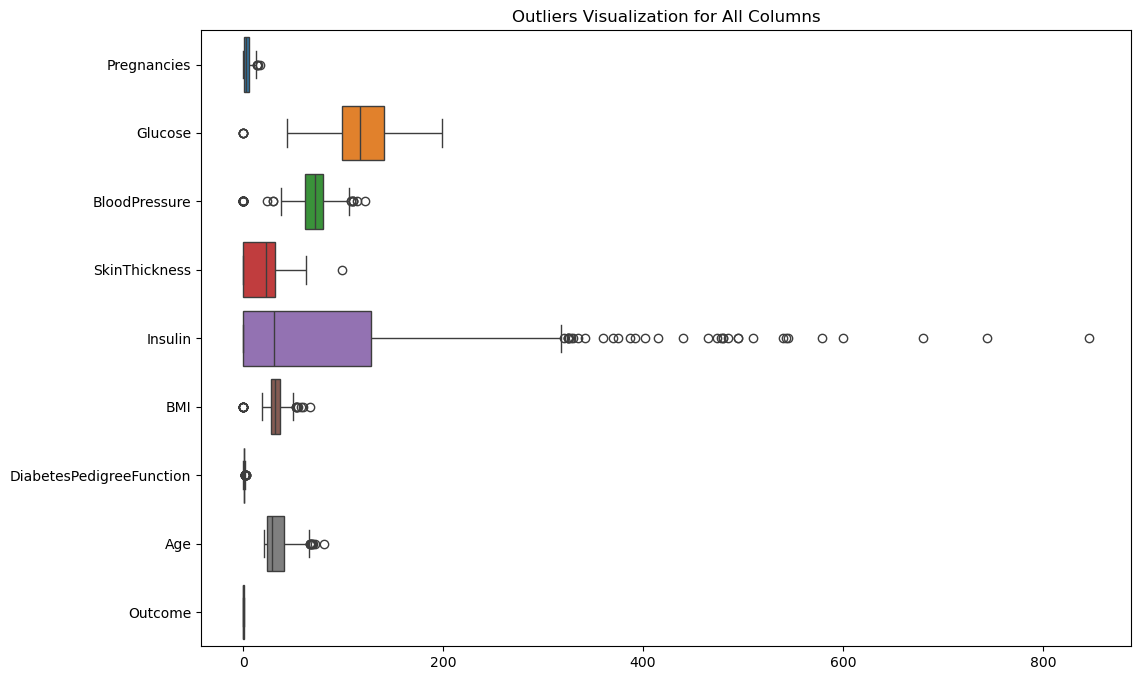

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, orient='h')

plt.title('Outliers Visualization for All Columns')
plt.show()

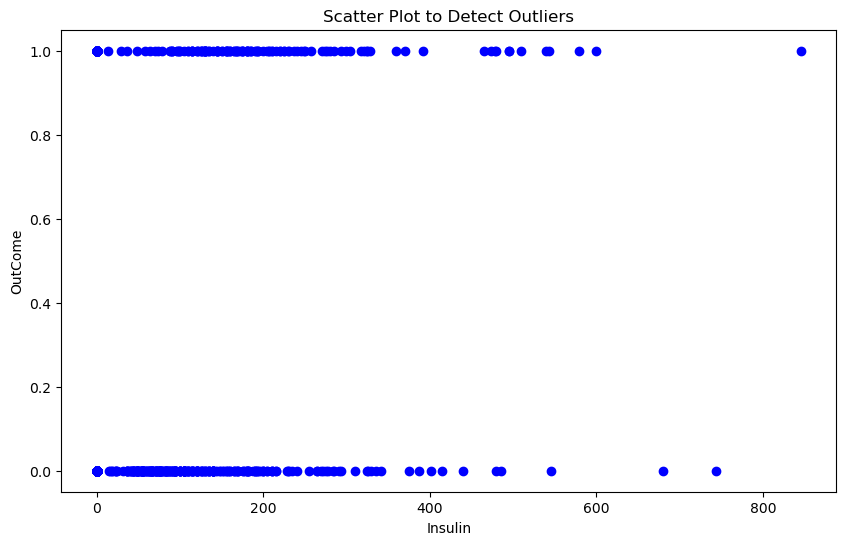

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Insulin'], df['Outcome'], color='blue')
plt.xlabel('Insulin')
plt.ylabel('OutCome')
plt.title('Scatter Plot to Detect Outliers')
plt.show()


*From my domain knowledge 600 insulin level can be messured sometimes but anything higher than that is considered an outlier*

**Use domain knowledge instead of IQR**

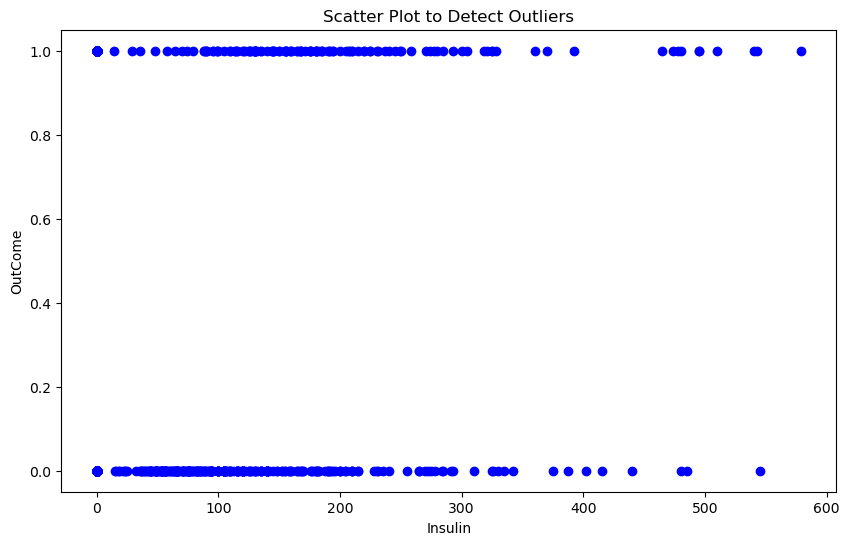

In [10]:
df['Insulin'] = df[df['Insulin'] < 600]['Insulin']

plt.figure(figsize=(10, 6))
plt.scatter(df['Insulin'], df['Outcome'], color='blue')
plt.xlabel('Insulin')
plt.ylabel('OutCome')
plt.title('Scatter Plot to Detect Outliers')
plt.show()

### Check `Skinthickness`

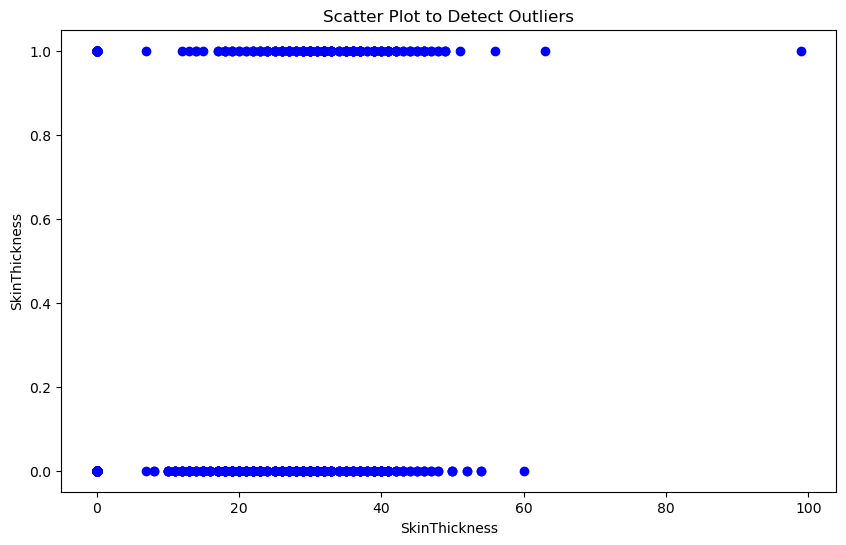

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SkinThickness'], df['Outcome'], color='blue')
plt.xlabel('SkinThickness')
plt.ylabel('SkinThickness')
plt.title('Scatter Plot to Detect Outliers')
plt.show()


`Seems good to me but the leading zeros skew the data to the left that is why 60 is considered an outlier but inface it is not`

## Check if some columns have zero in it 

In [12]:
(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**IT is absolutely normal to for the `pregnanccies` and `outcome` columns to have Zeros**  
we should invesigate the rest of the columns

`I Will investigate the Insulin column first`

**To determine whether to drop the column ot keep it we neef to study it's corr on our outcome**

**Before dropping**


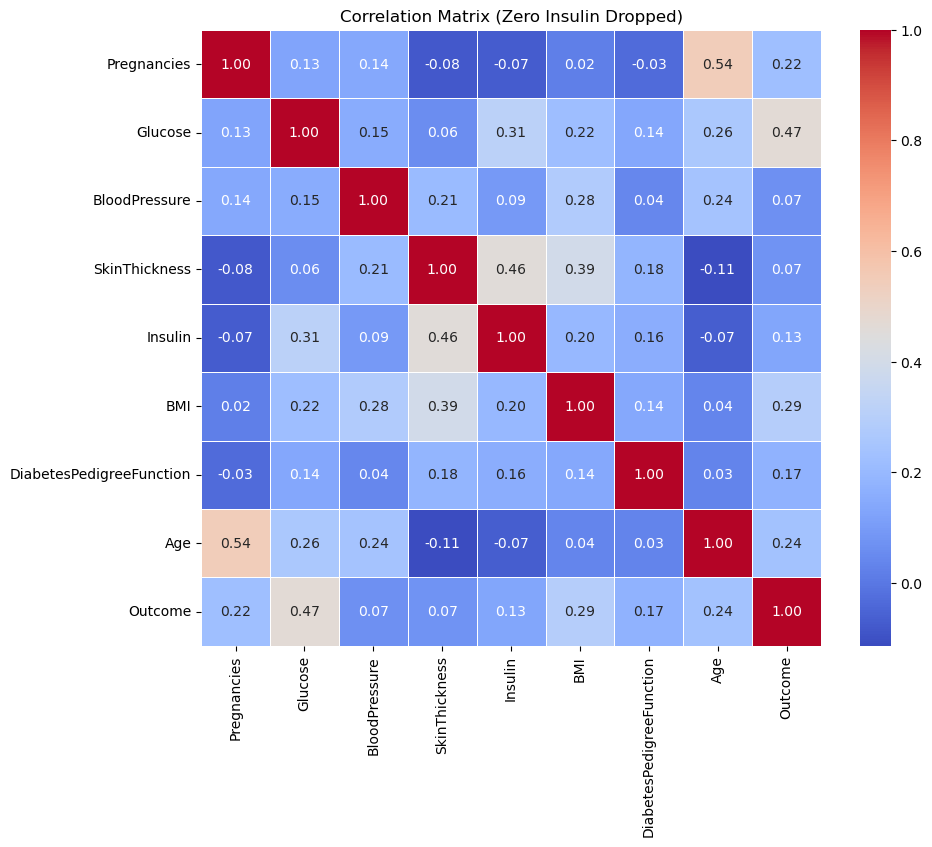

**After dropping**


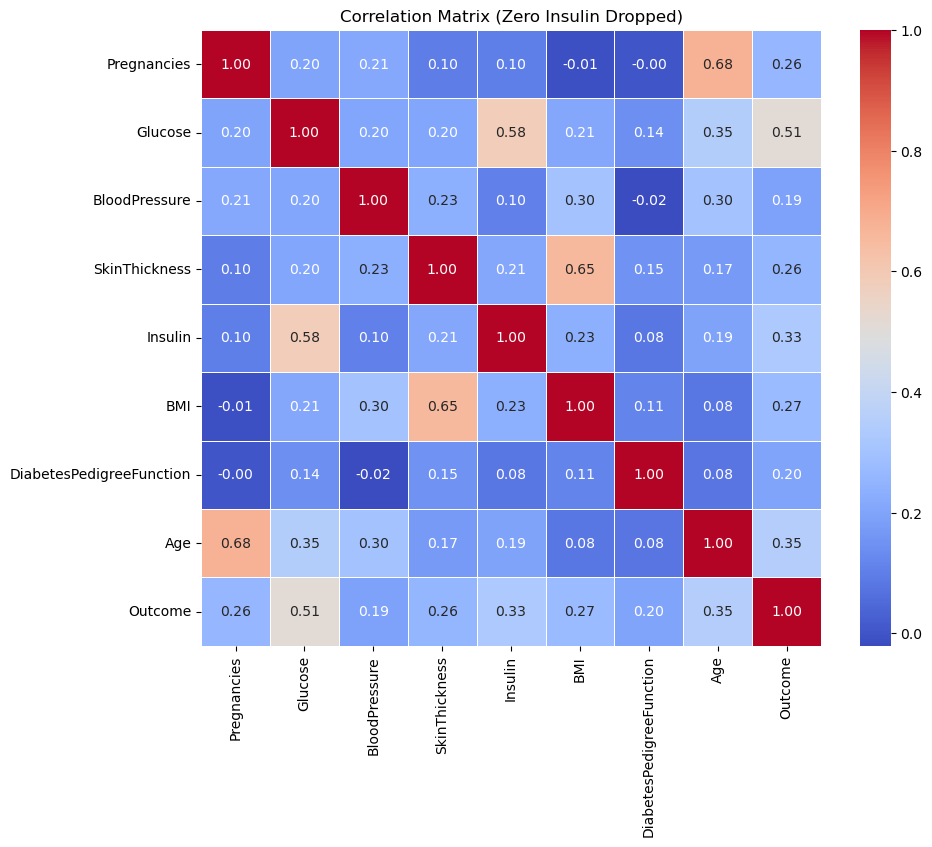

In [ ]:
df_filtered = df[(df['Insulin'] != 0) & (df['SkinThickness'] !=0)]

df_filtered = df_filtered.reset_index(drop=True)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Zero Insulin Dropped)')
print("**Before dropping**")
plt.show()


corr_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Zero Insulin Dropped)')
print("**After dropping**")
plt.show()

**I will use KNNImputer To predict the missing values in `Insluin` and `SkinThickness` columns**

In [14]:
from sklearn.impute import KNNImputer

cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing_zeros] = df[cols_with_missing_zeros].replace(0, np.nan)


imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


**Check the corr matrix again**

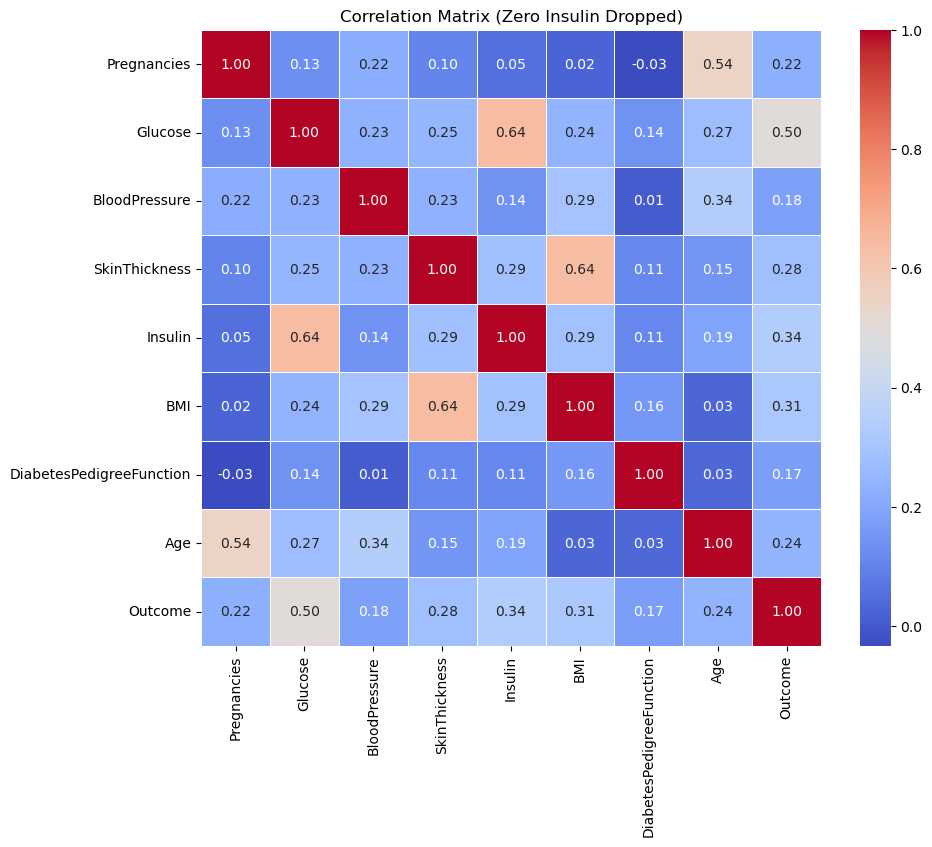

In [ ]:
corr_matrix = df_imputed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Zero Insulin Dropped)')
plt.show()

**Apply changes to the original variable `df`**

In [16]:
df = df_imputed

### Dealing with other columns

**After thinking I will just KNN them in the code above with `Insluin` and `SkinThickness` columns**

# Train model

Accuracy: 0.7727272727272727
Confusion Matrix:
 [[84 15]
 [20 35]]
Recall: 0.6363636363636364


c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


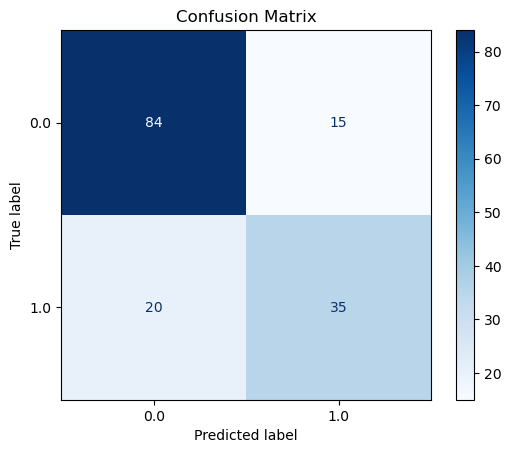

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,ConfusionMatrixDisplay


X = df.drop("Outcome", axis=1) 
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Apply standard scaler

In [ ]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[82 17]
 [20 35]]
Recall: 0.6363636363636364


# try pruining outlieers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


### test again

In [ ]:

X = df_no_outliers.drop("Outcome", axis=1) 
y = df_no_outliers["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Accuracy: 0.7573529411764706
Confusion Matrix:
 [[82  8]
 [25 21]]
Recall: 0.45652173913043476


`was a bad move` 

Random Forest Classifier Results:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        99
         1.0       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



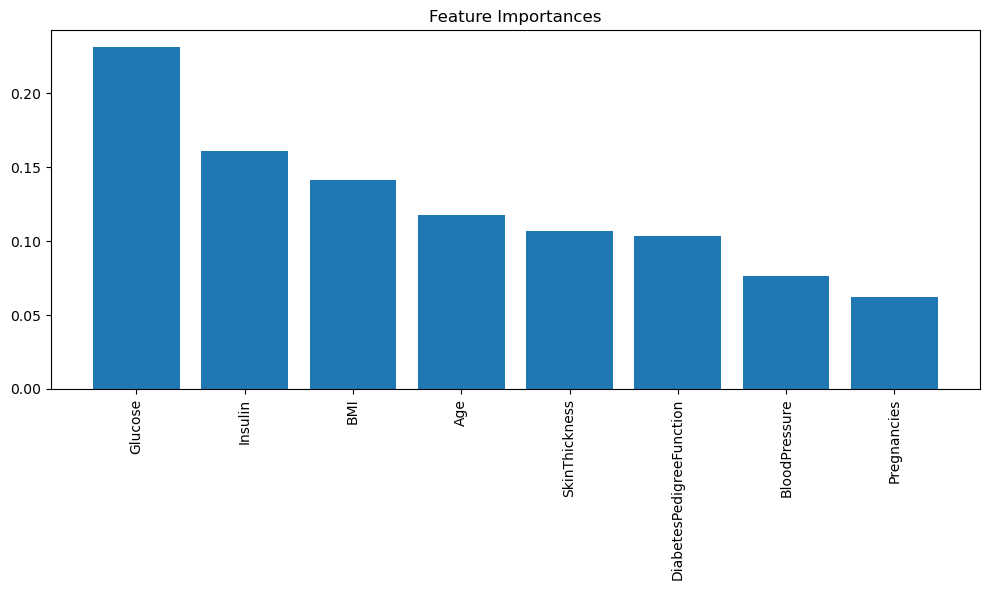

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)  
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

### There is clearl class imbalance because of the data we are working on so we will use SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {y_train.value_counts()}")
print(f"Resampled class distribution: {y_resampled.value_counts()}")




Original class distribution: Outcome
0.0    401
1.0    213
Name: count, dtype: int64
Resampled class distribution: Outcome
0.0    401
1.0    401
Name: count, dtype: int64


Random Forest Classifier Results:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79        99
         1.0       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154



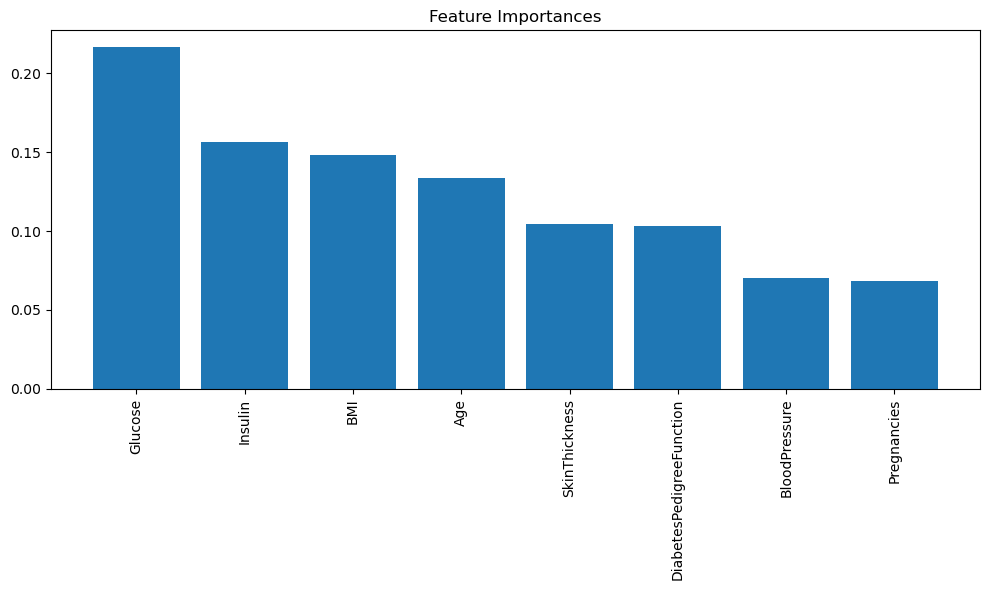

In [ ]:




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_resampled)

y_pred = rf_model.predict(X_test_scaled)

print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Adjusting thereshold

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)
threshold = 0.59 
y_pred = (y_pred_proba[:, 1] > threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82        99
         1.0       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Hyper tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_resampled)

print("Best parameters:", grid_search.best_params_)



best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.7532
              precision    recall  f1-score   support

         0.0       0.87      0.73      0.79        99
         1.0       0.62      0.80      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154



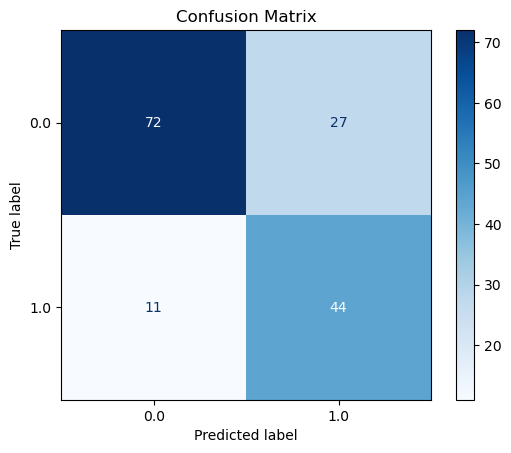

In [26]:
from sklearn.metrics import  ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()